In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from Pathly import overlay, overlay_gen
from PathFinder import path_finder

In [4]:
entry = (3,25)
goal_nodes = [(1,6),(4,0),(10,4),(9,10),(14,15),(1, 15),(14,22),(7,23)]
grid = np.load('./np_map.npy')

In [60]:
def is_safe(grid, coordinates, fire=None):
    x, y = coordinates
    if fire is None:
        fire = np.zeros(grid.shape)
    if not is_valid(grid, coordinates) or grid[x, y] == 0 or fire[x, y] == 1:
        return False
    return True

def is_valid(grid, coordinates):
    x, y = coordinates
    return 0 <= x < grid.shape[0] and 0 <= y < grid.shape[1]

In [61]:
from collections import deque

def bfs(grid=None, goal_nodes=None, entry=(3, 25), fire=None):
    if not is_safe(grid, entry, fire):
        print('entry point is not safe')
        return None
    q = deque()
    q.append(entry)
    visited = []
    visited.append(entry)
    parent = {}
    goal = None
    while q:
        current = q.popleft()
        if current in goal_nodes:
            goal = current
            print('found goal: ',current)
            break
        children = [
                    (current[0], current[1]-1), (current[0], current[1]+1), 
                    (current[0]-1, current[1]), (current[0]+1, current[1]), 
                    (current[0]-1, current[1]-1), (current[0]+1, current[1]+1), 
                    (current[0]-1, current[1]+1), (current[0]+1, current[1]-1)
                    ]
        for child in children:
            if is_safe(grid, child):
                if child not in visited:
                    q.append(child)
                    visited.append(child)
                    parent[child] = current
    if goal is None:
        print('goal not found')
        return None
    return (parent, goal)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


found goal:  (7, 23)
[(7, 23), (6, 23), (5, 24), (4, 25), (3, 25)]


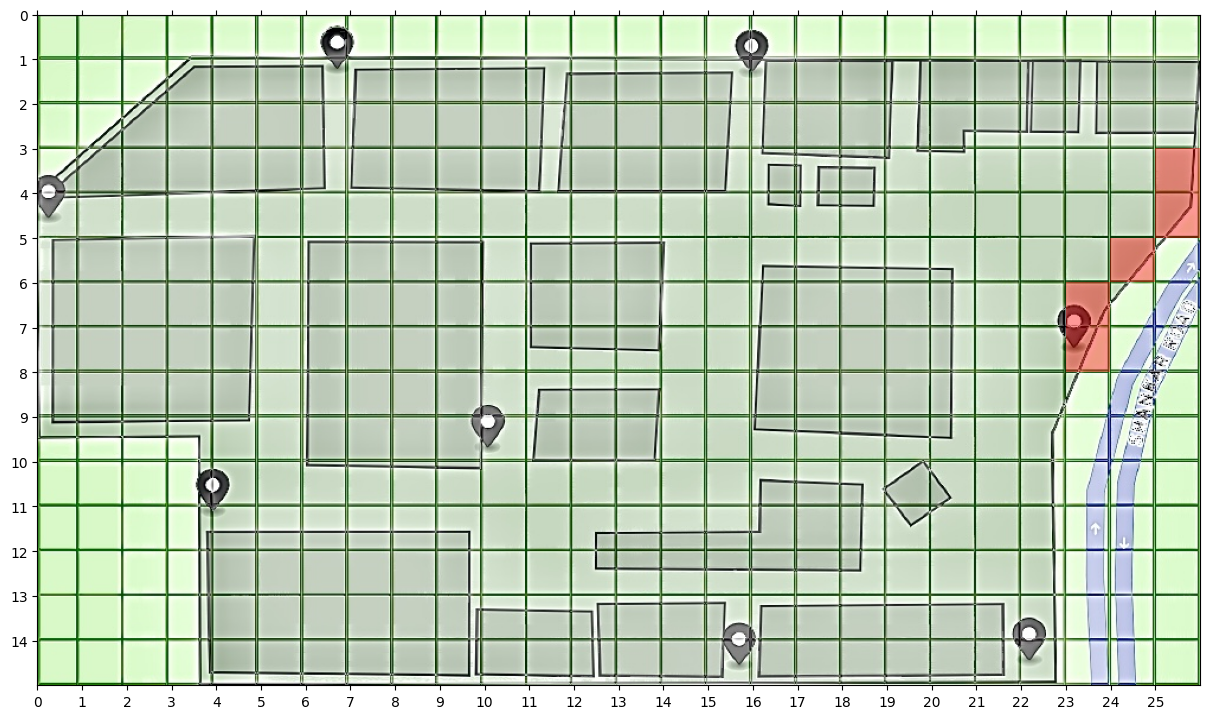

In [62]:
parent, goal = bfs(grid, goal_nodes, entry)

def get_path(parent, goal):
    path = []
    while goal:
        path.append(goal)
        goal = parent.get(goal, None)
    return path

path = get_path(parent, goal)
print(path)

mp = np.zeros(grid.shape)
for node in path:
    mp[node] = 1

overlay(grid = mp, alpha=0.4, color=[255,0,0], figsize=(15, 26))